In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
# To make it more "human", we can randomize the waiting time:
from time import sleep
from random import randint
import pandas as pd

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [3]:
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"
track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [4]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [5]:
def get_user_input():
    user_song = input("Please enter a song name: ")
    user_song = user_song.lower().title()
    return user_song

In [6]:
get_user_input()

'Hallo'

In [7]:
# loading the dataframe

df = pd.read_csv("trekkies.csv")
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947
1,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
2,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373
3,0.662,0.398,-6.691,0.0275,0.7160,0.000000,0.1110,0.468,107.001,4sx6NRwL6Ol3V6m9exwGlQ,145850
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520
...,...,...,...,...,...,...,...,...,...,...,...
11845,0.571,0.750,-5.987,0.0307,0.4190,0.000000,0.1040,0.563,87.982,200n4pv4B6L2LfcCaBcybk,242867
11846,0.530,0.449,-6.945,0.0719,0.8740,0.000000,0.0979,0.709,119.423,75kJOIJ51DjbMWf4yqGejQ,170400
11847,0.866,0.695,-7.347,0.0357,0.3350,0.884000,0.1260,0.899,117.031,4T4V2y8HwBOyjFUt4REcuk,211160
11848,0.494,0.994,-0.103,0.2210,0.0193,0.000010,0.4250,0.352,134.993,2RbN9haJQxFgFM20hdFcFP,163556


In [8]:

X = df.select_dtypes(include=[np.number])

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
1,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
2,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373
3,0.662,0.398,-6.691,0.0275,0.7160,0.000000,0.1110,0.468,107.001,145850
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.375629,0.451120,0.534837,-0.506723,-0.740967,-0.037682,-0.155983,-0.341227,-1.088341,-0.758914
1,0.664344,0.744649,0.101921,-0.409954,-0.141090,-0.498887,0.411261,1.364286,0.391680,-1.008986
2,-0.212904,0.478886,0.602529,0.158237,-0.483191,-0.499148,-0.596738,-0.993907,-0.848513,0.532400
3,0.475569,-0.885628,0.371824,-0.609708,1.251321,-0.499297,-0.481985,-0.146978,-0.481924,-0.847204
4,0.769836,-0.005040,0.490285,-0.424158,0.354056,-0.499297,-0.669763,-1.296936,-0.786495,-0.022100


In [10]:
kmeans = KMeans(n_clusters=19, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=19, random_state=1234)

In [11]:
kmeans.labels_

array([ 1,  9,  2, ..., 15,  7,  1], dtype=int32)

In [12]:
# assign a cluster to each example
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

NameError: name 'labels' is not defined

In [12]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      573
1     1108
2     1095
3      615
4      300
5      742
6     1090
7      820
8      415
9     1669
10     396
11      77
12     305
13     687
14     579
15     389
16     833
17       6
18     151
dtype: int64

In [13]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,1
1,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013,9
2,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373,2
3,0.662,0.398,-6.691,0.0275,0.7160,0.000000,0.1110,0.468,107.001,145850,16
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,1
...,...,...,...,...,...,...,...,...,...,...,...
11845,0.571,0.750,-5.987,0.0307,0.4190,0.000000,0.1040,0.563,87.982,242867,2
11846,0.530,0.449,-6.945,0.0719,0.8740,0.000000,0.0979,0.709,119.423,170400,16
11847,0.866,0.695,-7.347,0.0357,0.3350,0.884000,0.1260,0.899,117.031,211160,15
11848,0.494,0.994,-0.103,0.2210,0.0193,0.000010,0.4250,0.352,134.993,163556,7


In [14]:
X[X['cluster'] == 0].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
7073,0.371,0.378,-16.998,0.0414,0.8,0.11,0.25,0.626,140.467,268627,0


In [15]:
kmeans.inertia_

41446.174848083916

In [53]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

156218.58395112975


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

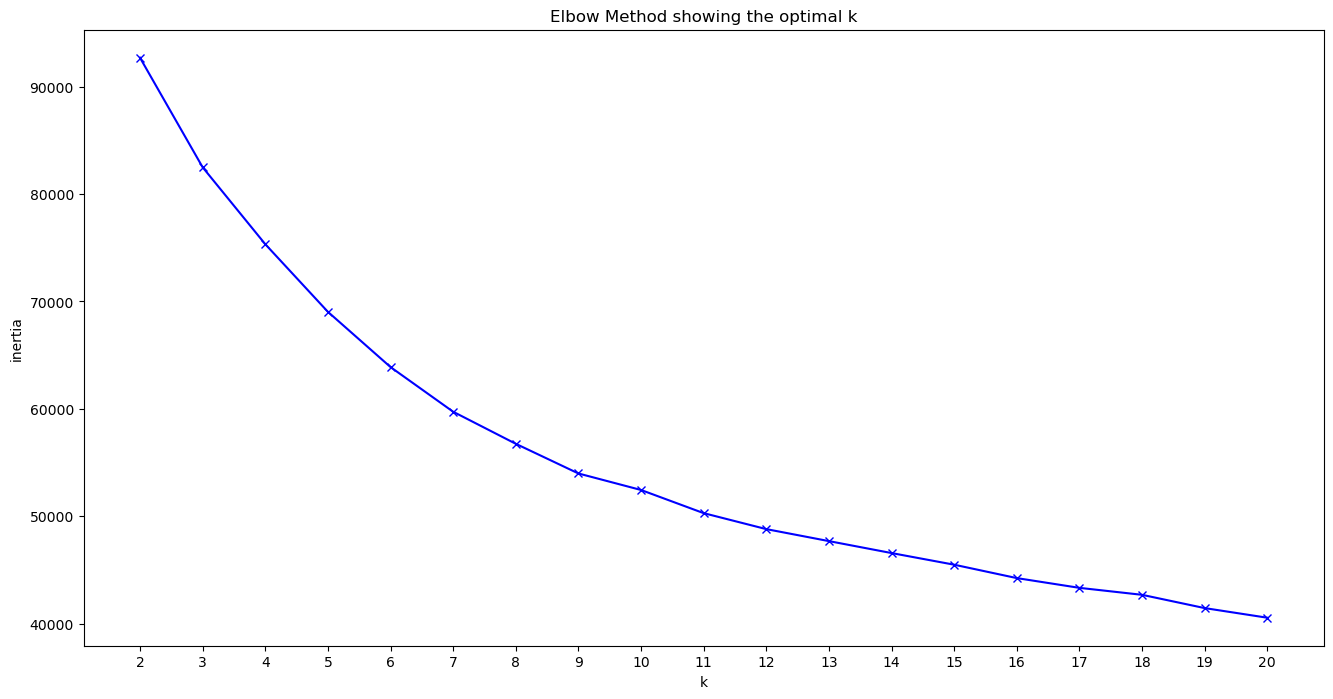

In [18]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Silhouette metric

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

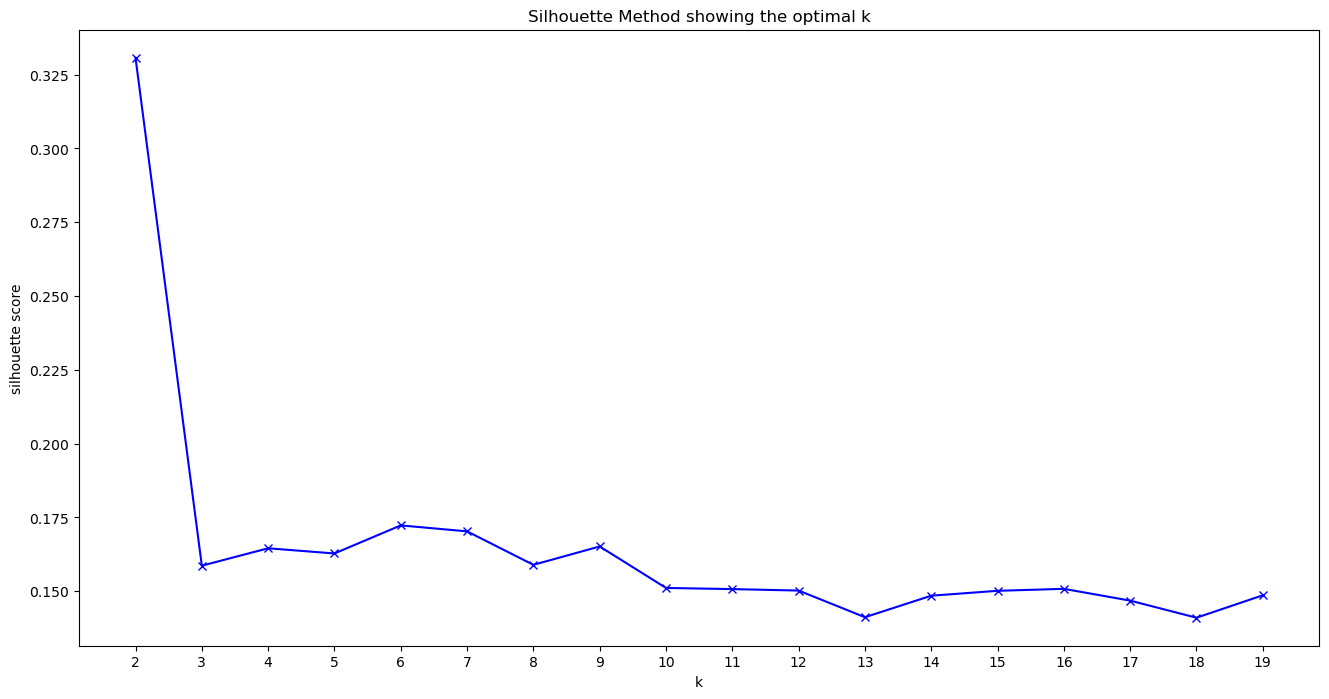

In [19]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [17]:
kmeans9 = KMeans(n_clusters=19,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans9.fit(X_scaled_df)
print(kmeans9.inertia_)

44893.77592592398


In [18]:
labels_9c = kmeans9.predict(X_scaled_df)


In [19]:
X_scaled_df['cluster'] = labels_9c
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.375629,0.451120,0.534837,-0.506723,-0.740967,-0.037682,-0.155983,-0.341227,-1.088341,-0.758914,2
1,0.664344,0.744649,0.101921,-0.409954,-0.141090,-0.498887,0.411261,1.364286,0.391680,-1.008986,10
2,-0.212904,0.478886,0.602529,0.158237,-0.483191,-0.499148,-0.596738,-0.993907,-0.848513,0.532400,0
3,0.475569,-0.885628,0.371824,-0.609708,1.251321,-0.499297,-0.481985,-0.146978,-0.481924,-0.847204,6
4,0.769836,-0.005040,0.490285,-0.424158,0.354056,-0.499297,-0.669763,-1.296936,-0.786495,-0.022100,0
...,...,...,...,...,...,...,...,...,...,...,...
11845,-0.029681,0.510619,0.493393,-0.581298,0.360058,-0.499297,-0.527626,0.222097,-1.121925,0.210668,2
11846,-0.257322,-0.683331,0.327963,-0.215526,1.725461,-0.499297,-0.567398,0.789306,-0.063916,-0.579511,6
11847,1.608219,0.292455,0.258544,-0.536909,0.107983,2.334512,-0.384185,1.527455,-0.144408,-0.135065,14
11848,-0.457201,1.478472,1.509461,1.108180,-0.839396,-0.499266,1.565310,-0.597637,0.460025,-0.654138,11


# get track id's and features

In [20]:
def get_track_id(song):
    id = sp.search(q=song,limit=1)["tracks"]["items"][0]["id"]
    return id

In [21]:
def get_features(track_id):
    features = []
    features.extend(sp.audio_features(track_id))
    features = pd.DataFrame(features)[["danceability","energy","loudness","speechiness","acousticness", "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
    features = features.drop("id", axis=1)
    features_scaled = scaler.transform(features)
    features_scaled= pd.DataFrame(features_scaled, columns = features.columns)
    return features_scaled

# 

In [22]:
user_song_features = get_features(get_track_id(get_user_input()))

In [24]:
targt_cluster = kmeans9.predict(user_song_features)[0]
targt_cluster

9

In [25]:
extracted_id = df['id']

In [26]:
X_scaled_df_final = X_scaled_df.join(extracted_id)
X_scaled_df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.375629,0.451120,0.534837,-0.506723,-0.740967,-0.037682,-0.155983,-0.341227,-1.088341,-0.758914,2,1Qrg8KqiBpW07V7PNxwwwL
1,0.664344,0.744649,0.101921,-0.409954,-0.141090,-0.498887,0.411261,1.364286,0.391680,-1.008986,10,6AQbmUe0Qwf5PZnt4HmTXv
2,-0.212904,0.478886,0.602529,0.158237,-0.483191,-0.499148,-0.596738,-0.993907,-0.848513,0.532400,0,5Z2MiIZ5I3jJvvmeWMLbOQ
3,0.475569,-0.885628,0.371824,-0.609708,1.251321,-0.499297,-0.481985,-0.146978,-0.481924,-0.847204,6,4sx6NRwL6Ol3V6m9exwGlQ
4,0.769836,-0.005040,0.490285,-0.424158,0.354056,-0.499297,-0.669763,-1.296936,-0.786495,-0.022100,0,2dHHgzDwk4BJdRwy9uXhTO
...,...,...,...,...,...,...,...,...,...,...,...,...
11845,-0.029681,0.510619,0.493393,-0.581298,0.360058,-0.499297,-0.527626,0.222097,-1.121925,0.210668,2,200n4pv4B6L2LfcCaBcybk
11846,-0.257322,-0.683331,0.327963,-0.215526,1.725461,-0.499297,-0.567398,0.789306,-0.063916,-0.579511,6,75kJOIJ51DjbMWf4yqGejQ
11847,1.608219,0.292455,0.258544,-0.536909,0.107983,2.334512,-0.384185,1.527455,-0.144408,-0.135065,14,4T4V2y8HwBOyjFUt4REcuk
11848,-0.457201,1.478472,1.509461,1.108180,-0.839396,-0.499266,1.565310,-0.597637,0.460025,-0.654138,11,2RbN9haJQxFgFM20hdFcFP


In [27]:
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.375629,0.451120,0.534837,-0.506723,-0.740967,-0.037682,-0.155983,-0.341227,-1.088341,-0.758914,2
1,0.664344,0.744649,0.101921,-0.409954,-0.141090,-0.498887,0.411261,1.364286,0.391680,-1.008986,10
2,-0.212904,0.478886,0.602529,0.158237,-0.483191,-0.499148,-0.596738,-0.993907,-0.848513,0.532400,0
3,0.475569,-0.885628,0.371824,-0.609708,1.251321,-0.499297,-0.481985,-0.146978,-0.481924,-0.847204,6
4,0.769836,-0.005040,0.490285,-0.424158,0.354056,-0.499297,-0.669763,-1.296936,-0.786495,-0.022100,0
...,...,...,...,...,...,...,...,...,...,...,...
11845,-0.029681,0.510619,0.493393,-0.581298,0.360058,-0.499297,-0.527626,0.222097,-1.121925,0.210668,2
11846,-0.257322,-0.683331,0.327963,-0.215526,1.725461,-0.499297,-0.567398,0.789306,-0.063916,-0.579511,6
11847,1.608219,0.292455,0.258544,-0.536909,0.107983,2.334512,-0.384185,1.527455,-0.144408,-0.135065,14
11848,-0.457201,1.478472,1.509461,1.108180,-0.839396,-0.499266,1.565310,-0.597637,0.460025,-0.654138,11


In [28]:
possible_ids = X_scaled_df_final.loc[(X_scaled_df_final['cluster'] == targt_cluster), ['id']]
type(possible_ids)


pandas.core.frame.DataFrame

In [29]:
import random
possible_ids


,id
295,3VM35337X7Ro1tesUHnZ95
296,4xO3mTbZDnaDSJtRdgzXQc
297,2bjQvSk5T3A2dmnqqeRhzI
298,0jSUVrvKQ0qF8ee1usL34M
299,4516jKqIrGNIShWH3WBqmd
...,...
11697,3EGjfImtCQsNIh1mkupHAG
11698,7jNC5iMWd7GyZi4jVy3CW6
11735,0BGXoqBGIrgT1gjODZ7vrO
11767,0wEAlJJugzCzf8BqDusm9H


In [30]:
id_recommended_song = possible_ids['id'].sample().values[0]
id_recommended_song

'6WIUW1w11Xrm9ZUcMEGI96'

In [31]:
play_song(id_recommended_song)

In [34]:

def song_recommender():
    user_song_features = get_features(get_track_id(get_user_input()))
    targt_cluster = kmeans9.predict(user_song_features)[0]
    possible_ids = X_scaled_df_final.loc[(X_scaled_df['cluster'] == targt_cluster), ['id']]
    id_recommended_song = possible_ids['id'].sample().values[0]

    return play_song(id_recommended_song)


    

In [35]:
song_recommender()